<a href="https://colab.research.google.com/github/Abdullah2020/Hamoye_StageE/blob/master/PRACTICAL_TIME_SERIES_ANALYSIS_%26_FORECAST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRACTICAL TIME SERIES ANALYSIS & FORECAST**

**Wrangling Time Series Data**

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("Setup Completed...!!!")

Setup Completed...!!!


In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"

df = pd.read_csv(url)

# **Let know our data**

In [3]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
print("There are {} rows and {} columns in the dataset.".format(df.shape[0], df.shape[1]))


There are 144 rows and 2 columns in the dataset.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [7]:
missing_values = pd.DataFrame({'Count':df.isna().sum(),'Percentage':df.isna().sum()/len(df)*100})
missing_values

,Count,Percentage
Month,0,0.0
Passengers,0,0.0


# **Data wrangling**

Text(0, 0.5, 'Passengers')

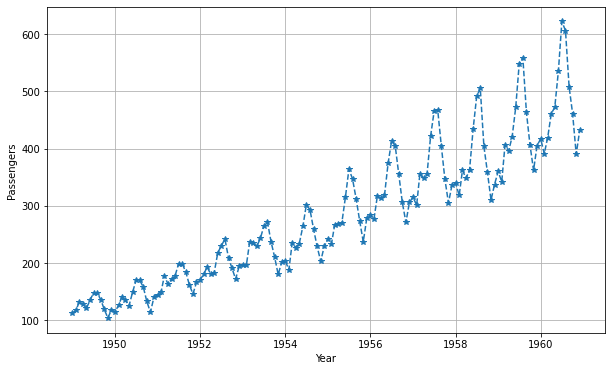

In [8]:
from matplotlib import markers
#convert column to datatime

df["Month"] = pd.to_datetime(df["Month"]) 

df.set_index("Month", inplace = True)
plt.figure(figsize=(10,6))
plt.plot(df.index, df.Passengers, "--", marker="*")
plt.grid()
plt.xlabel("Year")
plt.ylabel("Passengers")

Note: 
*  Since our dataset have no missing values. We will regenerate a random values and assign nan to get missing values. Thus, we can handle it.

In [9]:
#Let copy our main dataset

df_copy = df.copy()
rows = df_copy.sample(frac=0.1, random_state=0)
rows["Passengers"] = np.nan
df_copy.loc[rows.index, "Passengers"] = rows["Passengers"]
df_copy.isnull().sum()

Passengers    14
dtype: int64

In [10]:
missing_values = pd.DataFrame({'Count':df_copy.isna().sum(),'Percentage':df_copy.isna().sum()/len(df_copy)*100})
missing_values

,Count,Percentage
Passengers,14,9.722222


# **Handling Missing Time Series Data**

**Missing data:** is a common occurrence that happens during data collection due to faulty entries or outright omission. Time series data is no exception to this problem. Imputation, interpolation and deletion of missing data points are methods used to handle missing data in time series.

*  **Imputation**: Missing values are filled based on the overall observation of the entire data. They can be imputed using forward fill where the last known data point before the missing value is used and the opposite with backward fill where the next known value is used. The fillna() function in pandas is used to impute time series data for both forward and backward fill strategies. It is worth noting that backward fill is not appropriate as the imputation method when the data will be used in a predictive model.

*   **Rolling mean or moving average:** Another method of imputing missing values is by using a rolling mean or median known as the moving average. Unlike the forward fill, data from multiple recent times in the past are used in moving average to fill missing values. This is a better option particularly when the data is noisy to avoid inputting random noise.

*   **Interpolation**: This is another form of imputation where data points used to fill missing values are estimated such that they fit the constraints that arise from neighbouring data points. For example, if the overall behaviour of the time series is quadratic, this trend can be incorporated when filling the missing values such that they have a similar trend. The interpolate() function is provided in pandas to interpolate missing values.

When handling missing data, any method selected can be as a result of the domain and aim of the task.

Let fill missing data by imputation - **Forward fill**

In [11]:
df_copy_ffill = df_copy.fillna(method = "ffill")
df_copy_ffill.isnull().sum()

Passengers    0
dtype: int64

Let fill missing data by imputation - **Backward fill**

In [12]:
df_copy_bfill = df_copy.fillna(method = "bfill")
df_copy_bfill.isnull().sum()

Passengers    0
dtype: int64

Let fill missing data by imputation - **Interpolation (forward)**

In [13]:
df_copy_LIF = df_copy.interpolate(method = "linear", limit_direction="forward")
df_copy_LIF.isnull().sum()


Passengers    0
dtype: int64

Let fill missing data by imputation - **Interpolation (backward)**

In [14]:
df_copy_LIB = df_copy.interpolate(method = "linear", limit_direction="backward")
df_copy_LIB.isnull().sum()

Passengers    0
dtype: int64

# **DownSampling and UpSampling**

Resampling is a method of changing the time period of time series observations such that it can be summarised or aggregated. The frequency can either be increased by upsampling or reduced by downsampling.



**Downsampling**:

This reduces the number of samples in the data such that multiple data points are aggregated together. For example, if the temperature in a region is reported every minute and data for the past hour is required, 3600 data points will be obtained. If data for an entire week is needed, 604800 data points will be returned. This becomes quite messy when graphed but can be easily reduced by downsampling. The level of granularity of the original data might not be sensible or informative because it was sampled too frequently.

Additionally, downsampling helps focus on a specific portion of a seasonal cycle by creating subseries for that season. A dataset can match other low-frequency datasets by downsampling.


In [15]:
#Downsample to quarterly data points

df_quarterly = df.resample("3M").mean()
df_quarterly

,Passengers
Month,
1949-01-31,112.000000
1949-04-30,126.333333
1949-07-31,134.666667
1949-10-31,134.333333
1950-01-31,112.333333
1950-04-30,134.000000
1950-07-31,148.000000
1950-10-31,153.666667
1951-01-31,133.000000


In [16]:
"""df_quarterly.set_index("Month", inplace = True)
plt.figure(figsize=(10,6))
plt.plot(df_quarterly.index, df_quarterly.Passengers, "--", marker="*")
plt.grid()
plt.xlabel("Month")
plt.ylabel("Passengers")"""

'df_quarterly.set_index("Month", inplace = True)\nplt.figure(figsize=(10,6))\nplt.plot(df_quarterly.index, df_quarterly.Passengers, "--", marker="*")\nplt.grid()\nplt.xlabel("Month")\nplt.ylabel("Passengers")'


**Upsampling**:

In contrast to downsampling, upsampling tries to create more data points from infrequent samples such as changing the time period from minutes to seconds. Although this creates more samples, it does not necessarily add more information to the data. When a time series is irregular, it can be converted to a regular time series by upsampling.

In [17]:
#Upsample to daily data points

df_daily = df.resample("D").mean()

In [18]:
#df_daily

# **Smoothing Time Series Data**

**Moving average smoothing:** this is an effective and naive technique that involves determining the weighted averages of observed values or previous observations surrounding a certain time. A sliding window with a specified window size known as the window width is slid across the series to calculate the average values.  It can either be a centered where observations before and after time t are used or trailing where observations before or at time t  are used.

In [19]:
df_MA = df.copy()
MA = df_MA["Passengers"].rolling(12).mean()

In [20]:
MA

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    463.333333
1960-09-01    467.083333
1960-10-01    471.583333
1960-11-01    473.916667
1960-12-01    476.166667
Name: Passengers, Length: 144, dtype: float64

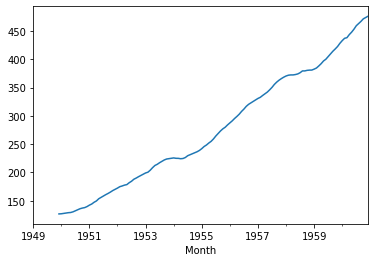

In [21]:
ax = plt.gca()

MA.plot(kind='line',x='Month',y='Passengers',ax=ax)
#df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()

# **Time Series Specific Exploratory Methods**

Exploratory data analysis helps identify patterns and structure in a dataset. It provides an initial understanding of the data and guide towards the first modelling steps. In time series, it is important to identify if there is any seasonality, trend or stationarity in the series so that the appropriate model can be used to forecast future values.

In [22]:
import statsmodels.api as sm
from pylab import rcParams

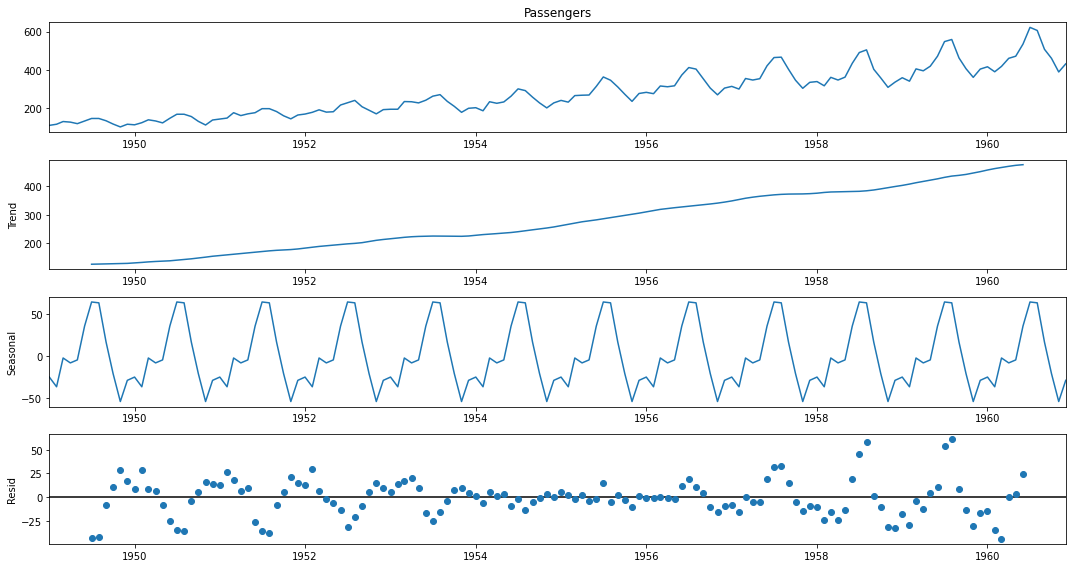

In [23]:
rcParams["figure.figsize"] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df["Passengers"], model = "additive")
decompose_series.plot()

plt.show()

As seen above, the decomposed time series show an obvious **increasing trend** and **seasonality variations**. Recall that we have initially plotted the moving average on the last 12 months which showed that it varies with time. 

This suggests that the data is not stationary. We will now perform an ADF test to confirm this speculation 

In [24]:
from statsmodels.tsa.stattools import adfuller    

In [25]:
adf_result = adfuller(df["Passengers"])

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values :')

for k, v in adf_result[4].items():
  print(f'  {k}: {v}')

ADF Statistic: 0.8153688792060472
p-value: 0.991880243437641
No. of lags used: 13
No. of observations used : 130
Critical Values :
  1%: -3.4816817173418295
  5%: -2.8840418343195267
  10%: -2.578770059171598


*   From the results obtained, the **p-value** is greater than the critical value at a **5% significance level** and, the ADF statistic is greater that any of the critical values 
obtain. 

*   **This confirms that the series is indeed non-stationary.**

Thus...

*   We convert time series to stationary by removing trend and seasonality 

*   Transformation and Differencing 

Text(0, 0.5, 'Passengers')

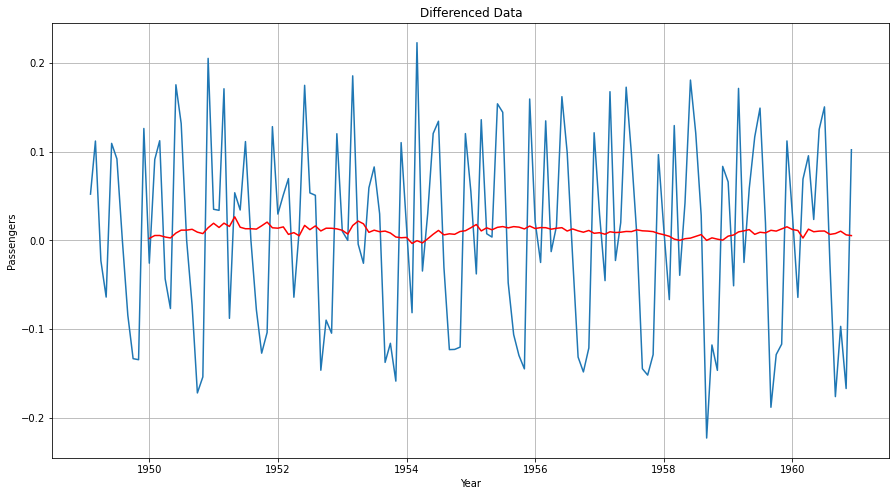

In [26]:
df_log = np.log(df)
df_diff = df_log.diff(periods = 1)

#let plot
plt.plot(df_diff.index, df_diff.Passengers, "-")
plt.plot(df_diff.rolling(12).mean(), color = "red")
plt.grid() 
plt.title("Differenced Data")
plt.xlabel( 'Year' ) 
plt.ylabel( 'Passengers' ) 


# **Lesson 4: Time Series Forecasting Using Stochastic Models**

In [27]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

**Autocorrelation Function (ACF):** Autocorrelation refers to the correlation between the past values in a time series. It measures the linear relationship between lagged values in the series. The ACF plot or correlogram is used to display the autocorrelation in a time series by lag. The correlation coefficient between -1 and 1 is displayed on the y-axis and the lags displayed on the x-axis. 

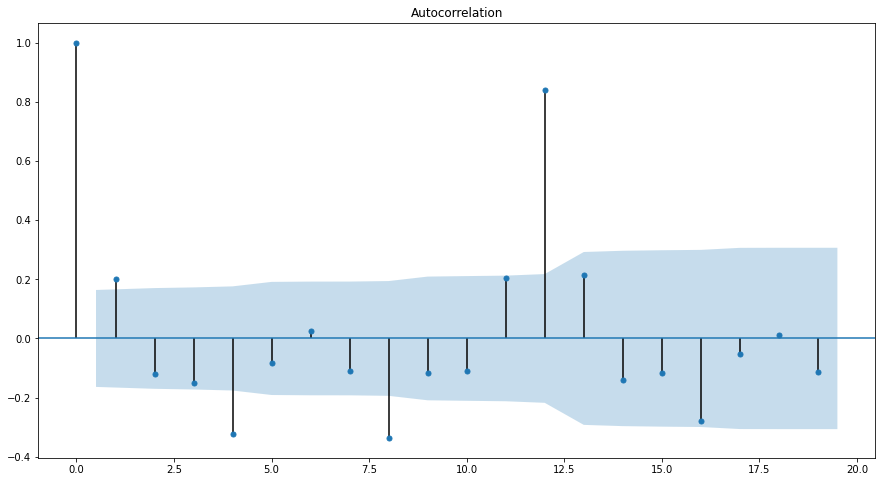

In [55]:
df_diff1 = df_diff.dropna()

#ACF
plot_acf(df_diff1, lags = range(0, 20))
plt.show()

**Partial Autocorrelation Function (PACF):**

PACF gives the partial correlation of a stationary series with its lagged values not accounted for by prior lagged observations. This gives an overview of the relationship between an observation in a series and observations in previous time steps while removing interfering observations. The PACF at a specific lag is the correlation that occurs after removing the effect of any correlations as a result of shorter lags. In contrast to ACF, it controls for other lags. 

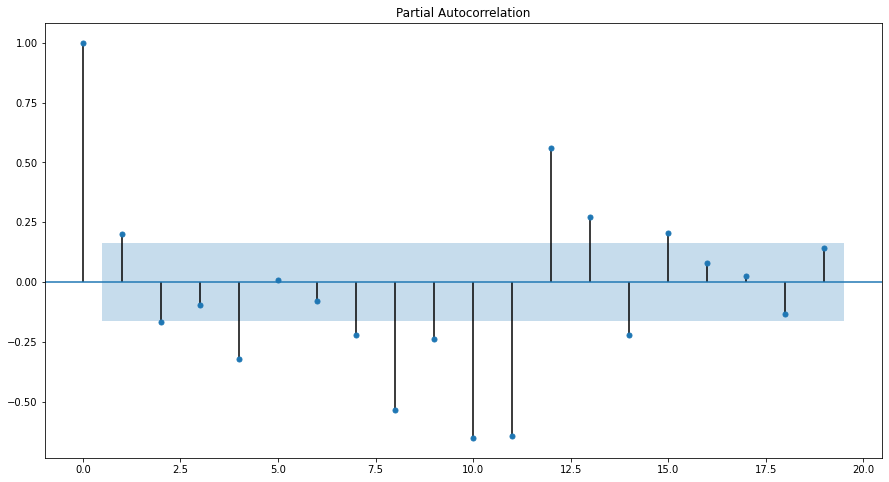

In [56]:
df_diff2 = df_diff.dropna()

#PACF
plot_pacf(df_diff2, lags=range(0, 20))
plt.show()

*   The shaded regions in the plots are the confidence intervals. The lags where the PACF and ACF charts cross this region are the values for p and q respectively. In both plots, **p=q=1.**

*   The shaded regions in the plots are the confidence intervals. The lags where the PACF and ACF charts cross this region are the values for p and q respectively. 

*   In the ACF plot, there is **one lag that crosses the significance level hence, q=1**. Similarly, in the **PACF plot, p=2**



# **AR, MA and ARIMA**




**Autoregressive Model (AR)**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 0, 'Year')

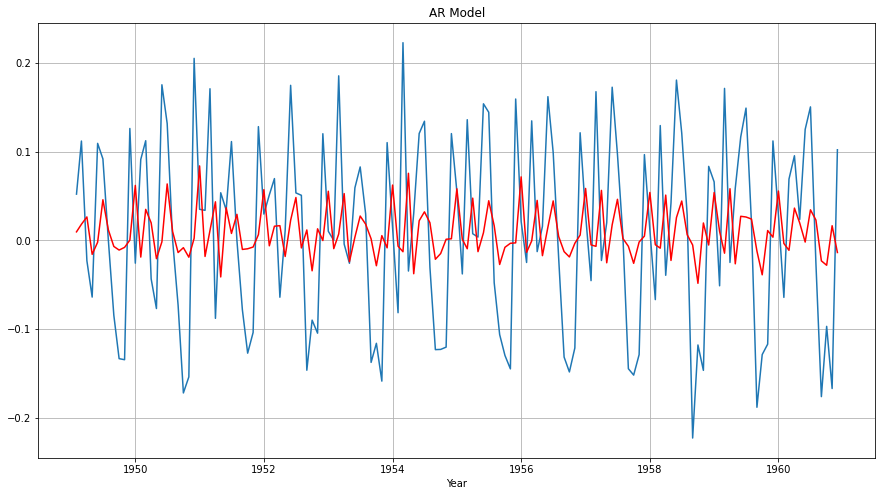

In [31]:
from statsmodels.tsa.arima_model import ARIMA

#let handle missing values
new_df_diff = df_diff.dropna()

#(p,d,q)
#define model
AR_model = ARIMA(new_df_diff, order=(2,0,0))
#fit model
AR_model_results = AR_model.fit()
#plot
plt.plot(new_df_diff)
plt.plot(AR_model_results.fittedvalues, color="red")
plt.grid() 
plt.title("AR Model")
plt.xlabel( 'Year' ) 

**Moving Average Model (MA)**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 0, 'Year')

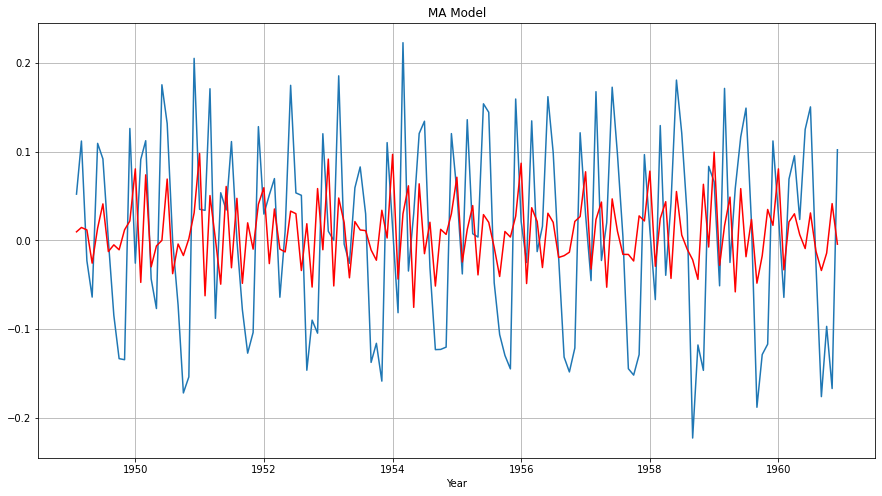

In [33]:
#Define model
MA_model = ARIMA(new_df_diff, order=(0,0,2))
#fit model
MA_model_results = MA_model.fit()
#plot
plt.plot(new_df_diff)
plt.plot(MA_model_results.fittedvalues, color="red")
plt.grid() 
plt.title("MA Model")
plt.xlabel( 'Year' )

**Autoregressive Integrated Moving Average (ARIMA)**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

Text(0.5, 0, 'Year')

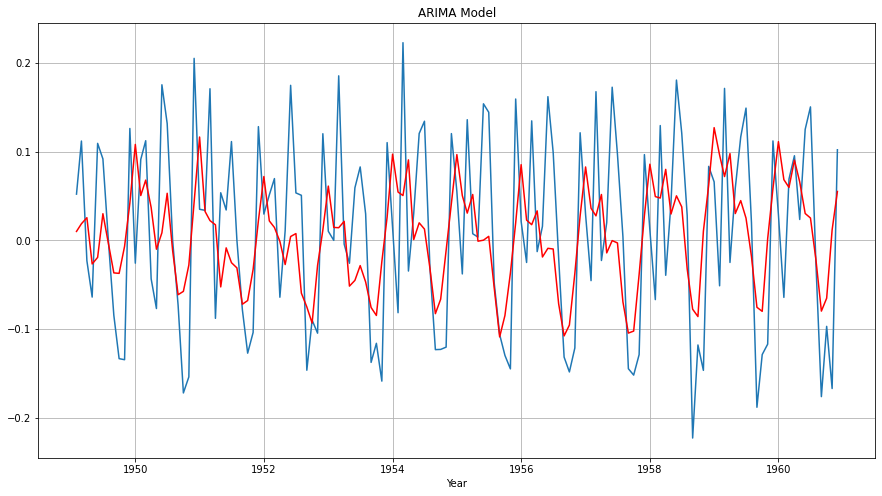

In [34]:
#Define model
ARIMA_model = ARIMA(new_df_diff, order=(2,0,1))
#fit model
ARIMA_results = ARIMA_model.fit()
#plot
plt.plot(new_df_diff)
plt.plot(ARIMA_results.fittedvalues, color="red")
plt.grid() 
plt.title("ARIMA Model")
plt.xlabel( 'Year' )

# **Lesson 5: Time Series at Scale**

**Time series with Facebook Prophet**

**Pip install pystan** AND p**ip install fbprophet**: These libraries are required to use the Prophet model that is already available under the fbprophet library.

In [37]:
!pip install pystan~=2.14

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 146 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0


In [38]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.1 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6637819 sha256=8e2bf7ac2421b3ad5b5d54a0c4ad50dc93a5ab9e66b4788877562f4a56f2b0a5
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1 requires cmdstanpy>=1.0.1, but you have cmdstanpy 0.9.5 which is incompatible.


In [39]:
from fbprophet import Prophet

In [40]:
url1 = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"

df_fb = pd.read_csv(url1)

In [41]:
df_fb.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [46]:
df_fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [47]:
#since Month column is an object, let convert it to datetime datatype

df_fb["Month"] = pd.to_datetime(df_fb["Month"])

In [48]:
df_fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [49]:
#let rename the columns

df_fb = df_fb.rename(columns={"Month": "ds", "Passengers": "y"})
df_fb.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [50]:
df_fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


**Facebook Prophet Model**

In [51]:
#define model
fb_model = Prophet()
#fit model
fb_model.fit(df_fb)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Predict for the next 10 months**

In [52]:
#10monts period
future = fb_model.make_future_dataframe(periods=10, freq="M")
#prediction
forecast = fb_model.predict(future)
forecast.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.727984,56.162092,111.063534,106.727984,106.727984,-21.920631,-21.920631,-21.920631,-21.920631,-21.920631,-21.920631,0.0,0.0,0.0,84.807353
1,1949-02-01,108.901201,48.816133,105.757244,108.901201,108.901201,-30.682847,-30.682847,-30.682847,-30.682847,-30.682847,-30.682847,0.0,0.0,0.0,78.218354
2,1949-03-01,110.864107,82.739898,136.664497,110.864107,110.864107,-0.502710,-0.502710,-0.502710,-0.502710,-0.502710,-0.502710,0.0,0.0,0.0,110.361397
3,1949-04-01,113.037323,80.040018,134.827281,113.037323,113.037323,-5.185501,-5.185501,-5.185501,-5.185501,-5.185501,-5.185501,0.0,0.0,0.0,107.851823
4,1949-05-01,115.140437,81.510717,140.112929,115.140437,115.140437,-3.788702,-3.788702,-3.788702,-3.788702,-3.788702,-3.788702,0.0,0.0,0.0,111.351735


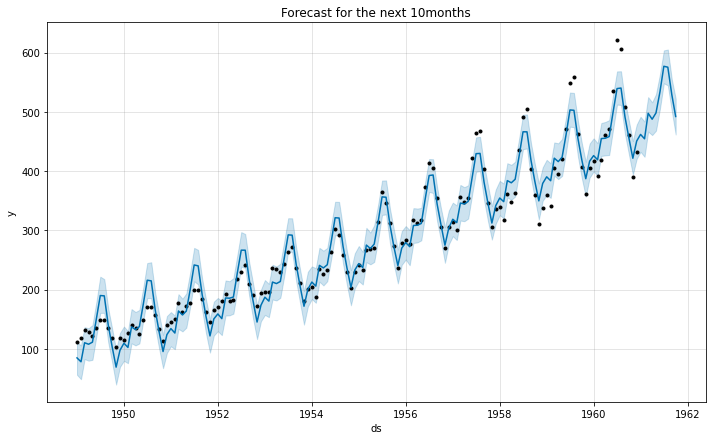

In [54]:
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

forecast[["ds", "yhat", "yhat_lower", "yhat_upper", "trend", "trend_lower", "trend_upper"]]

fb_model.plot(forecast)
plt.title("Forecast for the next 10months")
plt.show()